# Importación de liberias

In [1]:
import numpy as np
import pandas as pd
import sympy as sp

# Creacion del dataset

In [13]:
# Configuraciones iniciales
g = 9.81  # Gravedad en m/s^2
num_samples = 5000  # Número de trayectorias

#Utilizar Generator en vez de random uniform
# Crear un generador de números aleatorios con una semilla de 42
rng = np.random.default_rng(42)

# Generación de valores aleatorios para las variables
velocidades_iniciales = rng.uniform(10, 100, num_samples)  # m/s
angulos = rng.uniform(10, 80, num_samples)  # grados
masas = rng.uniform(0.5, 10, num_samples)  # kg
constantes_resistencia = rng.uniform(0.1, 1.0, num_samples)  # kg/m

In [23]:
# definimos variables simbolicas para utizar sympy
t = sp.symbols('t')
vx = sp.Function('vx')(t)
vy = sp.Function('vy')(t)
c, m, g = sp.symbols('c m g')

# definicion de ecuaciones diferenciales
# Ecuación diferencial para v_x
diffeq_vx = sp.Eq(vx.diff(t), - (c / m) * vx)

# Ecuación diferencial para v_y
diffeq_vy = sp.Eq(vy.diff(t), -g - (c / m) * vy)

#resolver
# Resolver la ecuación diferencial para v_x
solution_vx = sp.dsolve(diffeq_vx, vx)

# Resolver la ecuación diferencial para v_y
solution_vy = sp.dsolve(diffeq_vy, vy)

sp.pprint(solution_vx)
print("\n")
sp.pprint(solution_vy)



            -c⋅t 
            ─────
              m  
vx(t) = C₁⋅ℯ     


            -c⋅t       
            ─────      
              m     g⋅m
vy(t) = C₁⋅ℯ      - ───
                     c 


In [29]:
# Configuraciones iniciales
g = 9.81  # Gravedad en m/s^2
num_samples = 5000  # Número de trayectorias
time = np.linspace(0, 10, 500)  # 10 segundos divididos en 500 puntos de tiempo

# Crear un generador de números aleatorios con una semilla de 42
rng = np.random.default_rng(42)

# Generación de valores aleatorios para las variables
velocidades_iniciales = rng.uniform(10, 100, num_samples)  # m/s
angulos = rng.uniform(10, 80, num_samples)  # grados
masas = rng.uniform(0.5, 10, num_samples)  # kg
constantes_resistencia = rng.uniform(0.1, 1.0, num_samples)  # kg/m

# Convertir ángulos a radianes
angulos = np.deg2rad(angulos)

# Inicializar arrays para posiciones
x_positions = np.zeros((num_samples, len(time)))
y_positions = np.zeros((num_samples, len(time)))


In [27]:
from tqdm import tqdm

In [ ]:
trayectorias = []

# Calcular las trayectorias
for i in tqdm(range(num_samples)):
    v0x = velocidades_iniciales[i] * np.cos(angulos[i])
    v0y = velocidades_iniciales[i] * np.sin(angulos[i])
    m = masas[i]
    c = constantes_resistencia[i]

    # x_positions[i, :] = (v0x * m / c) * (1 - np.exp(-c * time / m))
    # y_positions[i, :] = (m / c) * ((v0y + (m * g / c)) * (1 - np.exp(-c * time / m)) - g * time)
    x_position = (v0x * m / c) * (1 - np.exp(-c * time / m))
    y_position = (m / c) * (
        (v0y + (m * g / c)) * (1 - np.exp(-c * time / m)) - g * time
    )
      
    trayectorias.append((x_position, y_position))

  0%|          | 0/5000 [00:00<?, ?it/s]

500
500


In [39]:
trayectorias[0][1]

array([ 0.00000000e+00,  6.79099899e-01,  1.35349805e+00,  2.02319973e+00,
        2.68821024e+00,  3.34853485e+00,  4.00417883e+00,  4.65514746e+00,
        5.30144599e+00,  5.94307969e+00,  6.58005379e+00,  7.21237354e+00,
        7.84004419e+00,  8.46307096e+00,  9.08145908e+00,  9.69521376e+00,
        1.03043402e+01,  1.09088437e+01,  1.15087294e+01,  1.21040024e+01,
        1.26946680e+01,  1.32807314e+01,  1.38621978e+01,  1.44390722e+01,
        1.50113600e+01,  1.55790662e+01,  1.61421960e+01,  1.67007545e+01,
        1.72547470e+01,  1.78041785e+01,  1.83490541e+01,  1.88893791e+01,
        1.94251584e+01,  1.99563973e+01,  2.04831009e+01,  2.10052742e+01,
        2.15229223e+01,  2.20360504e+01,  2.25446635e+01,  2.30487667e+01,
        2.35483651e+01,  2.40434637e+01,  2.45340677e+01,  2.50201820e+01,
        2.55018117e+01,  2.59789619e+01,  2.64516377e+01,  2.69198439e+01,
        2.73835858e+01,  2.78428682e+01,  2.82976963e+01,  2.87480750e+01,
        2.91940093e+01,  

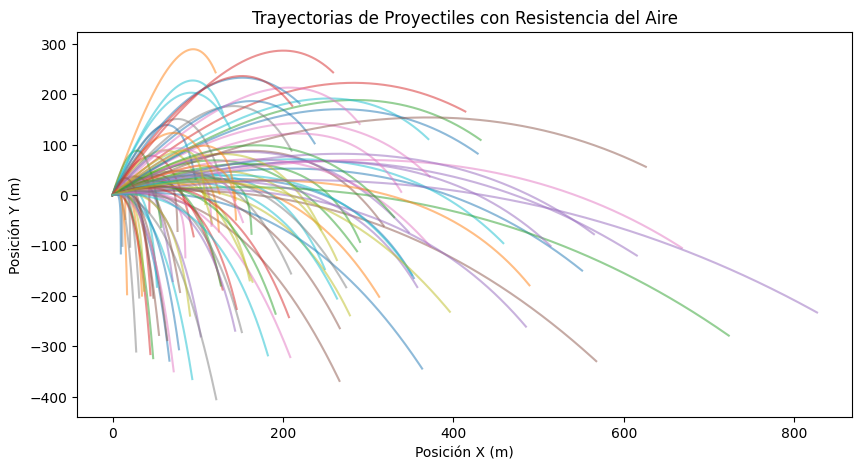

In [22]:
import matplotlib.pyplot as plt

# Graficar algunas trayectorias
plt.figure(figsize=(10, 5))
for i in range(0, num_samples, num_samples // 100):  # Graficar solo 100 trayectorias para claridad
    plt.plot(x_positions[i, :], y_positions[i, :], alpha=0.5)
plt.xlabel('Posición X (m)')
plt.ylabel('Posición Y (m)')
plt.title('Trayectorias de Proyectiles con Resistencia del Aire')
plt.show()

In [ ]:
# Método numérico para simular trayectorias (Euler)
def simular_trayectoria(v0, theta, m, c, dt=0.01, max_time=10):
    theta_rad = np.radians(theta)  # Convertir ángulo a radianes
    vx = v0 * np.cos(theta_rad)  # Componente horizontal de la velocidad
    vy = v0 * np.sin(theta_rad)  # Componente vertical de la velocidad

    # Posiciones iniciales
    x, y = 0, 0
    trayectoria = []

    for _ in np.arange(0, max_time, dt):
        ax = -(c / m) * vx  # Aceleración en x
        ay = -g - (c / m) * vy  # Aceleración en y

        # Actualizar velocidades
        vx += ax * dt
        vy += ay * dt

        # Actualizar posiciones
        x += vx * dt
        y += vy * dt

        # Guardar la posición
        trayectoria.append((x, y))

        # Detener si toca el suelo
        if y < 0:
            break

    return trayectoria

## Generación del dataset

In [58]:
# Generación del dataset
data = []
for v0, theta, m, c in zip(
    velocidades_iniciales, angulos, masas, constantes_resistencia
):
    trayectoria = simular_trayectoria(v0, theta, m, c)
    for punto in trayectoria:
        data.append([v0, theta, m, c, punto[0], punto[1]])  # Guardar datos

# Convertir a DataFrame
columnas = [
    "velocidad_inicial",
    "angulo",
    "masa",
    "constante_resistencia",
    "pos_x",
    "pos_y",
]
# datos = pd.DataFrame(data, columns=columnas)

# Guardar el dataset en un archivo CSV
# datos.to_csv("trayectorias_proyectil.csv", index=False)

# print("Generación de datos completada. Guardado en 'trayectorias_proyectil.csv'.")


x  ()
x  ()
x  ()
x  ()
x  ()
x  ()
x  ()
x  ()
x  ()
x  ()
x  ()
x  ()
x  ()
x  ()
x  ()
x  ()
x  ()
x  ()
x  ()
x  ()
x  ()
x  ()
x  ()
x  ()
x  ()
x  ()
x  ()
x  ()
x  ()
x  ()
x  ()
x  ()
x  ()
x  ()
x  ()
x  ()
x  ()
x  ()
x  ()
x  ()
x  ()
x  ()
x  ()
x  ()
x  ()
x  ()
x  ()
x  ()
x  ()
x  ()
x  ()
x  ()
x  ()
x  ()
x  ()
x  ()
x  ()
x  ()
x  ()
x  ()
x  ()
x  ()
x  ()
x  ()
x  ()
x  ()
x  ()
x  ()
x  ()
x  ()
x  ()
x  ()
x  ()
x  ()
x  ()
x  ()
x  ()
x  ()
x  ()
x  ()
x  ()
x  ()
x  ()
x  ()
x  ()
x  ()
x  ()
x  ()
x  ()
x  ()
x  ()
x  ()
x  ()
x  ()
x  ()
x  ()
x  ()
x  ()
x  ()
x  ()
x  ()
x  ()
x  ()
x  ()
x  ()
x  ()
x  ()
x  ()
x  ()
x  ()
x  ()
x  ()
x  ()
x  ()
x  ()
x  ()
x  ()
x  ()
x  ()
x  ()
x  ()
x  ()
x  ()
x  ()
x  ()
x  ()
x  ()
x  ()
x  ()
x  ()
x  ()
x  ()
x  ()
x  ()
x  ()
x  ()
x  ()
x  ()
x  ()
x  ()
x  ()
x  ()
x  ()
x  ()
x  ()
x  ()
x  ()
x  ()
x  ()
x  ()
x  ()
x  ()
x  ()
x  ()
x  ()
x  ()
x  ()
x  ()
x  ()
x  ()
x  ()
x  ()
x  ()
x  ()
x  ()
x  ()
x  (

## Red neuronal

#### Entrenamiento de la red 

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam, RMSprop
import matplotlib.pyplot as plt

/home/topo/Documents/Universidad/2024-2/InteligentesII/intelligent-II-neuronal-networks/.venv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


18222/18222 ━━━━━━━━━━━━━━━━━━━━ 8s 453us/step - loss: 2888.9905 - mae: 34.6961
Pérdida (Loss): 2889.3845, Error Absoluto Medio (MAE): 34.7014
18222/18222 ━━━━━━━━━━━━━━━━━━━━ 8s 412us/step
MAE para pos_x: 47.9718, MAE para pos_y: 21.4310
MSE para pos_x: 4747.1875, MSE para pos_y: 1024.2725
R² para pos_x: 0.5468, R² para pos_y: 0.7482
Precisión dentro del rango de tolerancia (1.0 unidades): 0.30%


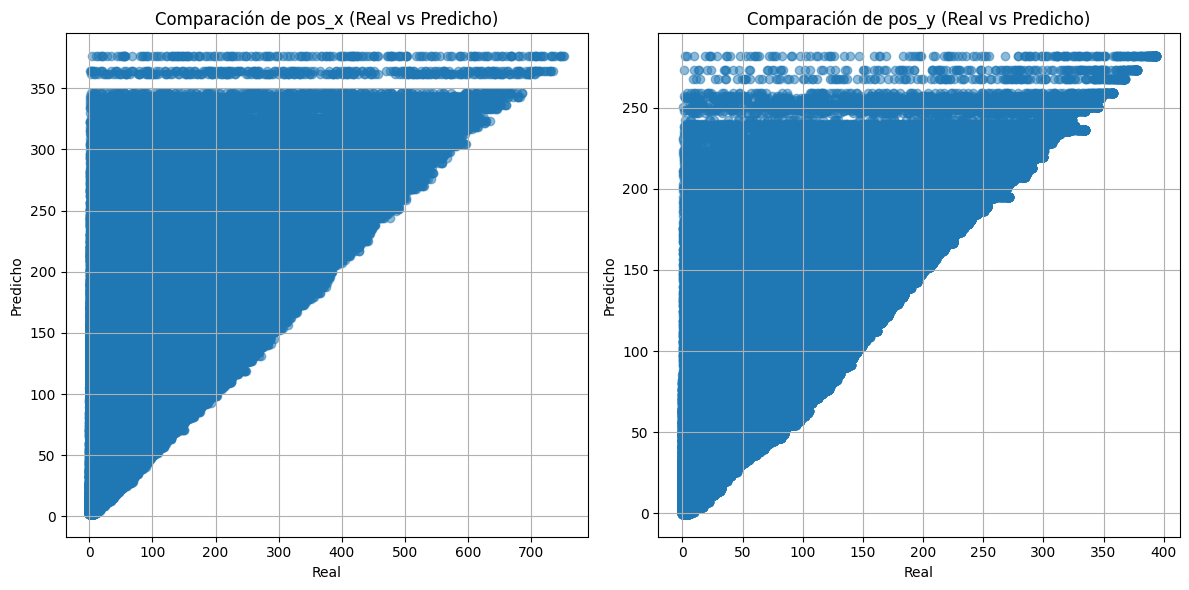

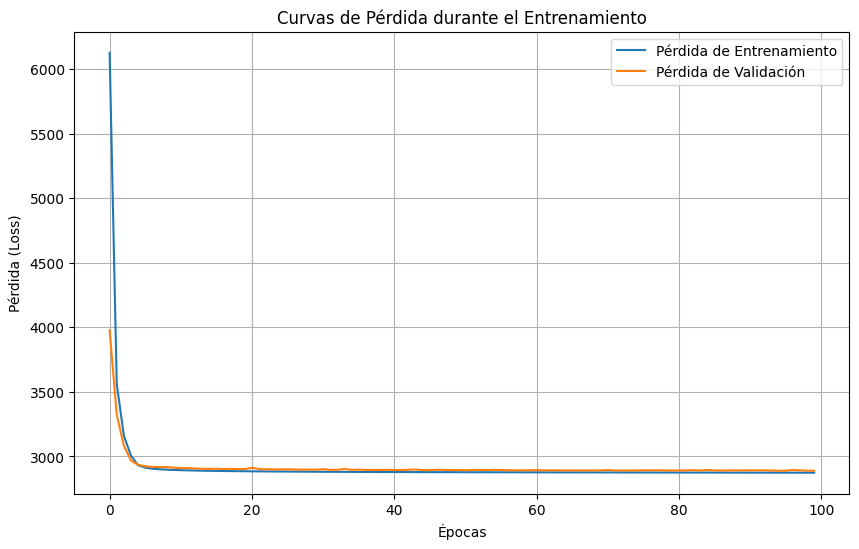

In [ ]:
# Cargar el dataset generado
datos = pd.read_csv("trayectorias_proyectil.csv")

# Separar características (X) y etiquetas (y)
X = datos[["velocidad_inicial", "angulo", "masa", "constante_resistencia"]].values
y = datos[["pos_x", "pos_y"]].values

# Dividir en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# ** Anterior
# Escalar los datos
# scaler = StandardScaler()
# X_train = scaler.fit_transform(X_train)
# X_test = scaler.transform(X_test)

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# ** anterior estaba 64 - 64
# Crear el modelo de red neuronal profunda
model = Sequential(
    [
        Dense(32, input_dim=4, activation="relu"),
        Dense(16, activation="relu", kernel_regularizer="l2"),
        Dense(2, activation="linear"),
    ]
)

# ** Anterior
# Compilar el modelo
# model.compile(
#    optimizer=Adam(learning_rate=0.001), loss="mean_squared_error", metrics=["mae"]
# )

model.compile(
    optimizer=RMSprop(learning_rate=0.001), loss="mean_squared_error", metrics=["mae"]
)

# model.add(Dropout(0.3))

# Entrenar el modelo
history = model.fit(
    X_train,
    y_train,
    epochs=100,
    batch_size=1024,
    validation_data=(X_test, y_test),
    verbose=0,
)

# Evaluar el modelo
loss, mae = model.evaluate(X_test, y_test)
print(f"Pérdida (Loss): {loss:.4f}, Error Absoluto Medio (MAE): {mae:.4f}")

# Predicciones en el conjunto de prueba
predicciones = model.predict(X_test)

# Calcular métricas de regresión
mae_x = mean_absolute_error(y_test[:, 0], predicciones[:, 0])
mae_y = mean_absolute_error(y_test[:, 1], predicciones[:, 1])

mse_x = mean_squared_error(y_test[:, 0], predicciones[:, 0])
mse_y = mean_squared_error(y_test[:, 1], predicciones[:, 1])

r2_x = r2_score(y_test[:, 0], predicciones[:, 0])
r2_y = r2_score(y_test[:, 1], predicciones[:, 1])

print(f"MAE para pos_x: {mae_x:.4f}, MAE para pos_y: {mae_y:.4f}")
print(f"MSE para pos_x: {mse_x:.4f}, MSE para pos_y: {mse_y:.4f}")
print(f"R² para pos_x: {r2_x:.4f}, R² para pos_y: {r2_y:.4f}")


# Precisión personalizada: porcentaje de predicciones dentro de una tolerancia
def accuracy_within_tolerance(y_true, y_pred, tolerance=0.1):
    diff = np.abs(y_true - y_pred)
    within_tolerance = np.all(diff <= tolerance, axis=1)
    return np.mean(within_tolerance) * 100


accuracy = accuracy_within_tolerance(y_test, predicciones, tolerance=1.0)
print(f"Precisión dentro del rango de tolerancia (1.0 unidades): {accuracy:.2f}%")

# Visualizar las predicciones vs valores reales (pos_x y pos_y separadamente)
plt.figure(figsize=(12, 6))

# Comparar pos_x
plt.subplot(1, 2, 1)
plt.scatter(y_test[:, 0], predicciones[:, 0], alpha=0.5)
plt.title("Comparación de pos_x (Real vs Predicho)")
plt.xlabel("Real")
plt.ylabel("Predicho")
plt.grid(True)

# Comparar pos_y
plt.subplot(1, 2, 2)
plt.scatter(y_test[:, 1], predicciones[:, 1], alpha=0.5)
plt.title("Comparación de pos_y (Real vs Predicho)")
plt.xlabel("Real")
plt.ylabel("Predicho")
plt.grid(True)

plt.tight_layout()
plt.show()

# Curvas de aprendizaje
plt.figure(figsize=(10, 6))
plt.plot(history.history["loss"], label="Pérdida de Entrenamiento")
plt.plot(history.history["val_loss"], label="Pérdida de Validación")
plt.title("Curvas de Pérdida durante el Entrenamiento")
plt.xlabel("Épocas")
plt.ylabel("Pérdida (Loss)")
plt.legend()
plt.grid(True)
plt.show()